# Google Scraping Workaround using an API Key

In order for this to work you're going to have to use the Google JSON API. Here are the steps that can get you there.

You will need a Google account to do this.

## Step 1: Sign into the Google Cloud Console

Go to https://console.cloud.google.com/marketplace/product/google/customsearch.googleapis.com?q=search&referrer=search&hl=en-au&inv=1&invt=AbnIJg and enable the API. There is a free tier that allows 100 searches per day. Do not go over this limit. If you do, you will have to pay $0.005 per search after 100. You shouldn't need this many to complete anything in this course.

## Step 2: Create your Credentials

Scroll down and click the link for Credentials in APIs and services.

Click +Create Credentials at the top, then select API key

## Step 3: Create the CSE_ID

Go to https://programmablesearchengine.google.com/controlpanel/all

Click Create your first search engine!

Enter a name for the engine.

CLick the Search the entire web radio button.

I recommend enabling SafeSearch just in case.

Click the Captcha so it knows you're a real person.

Click the blue create button.

Click customize.

Copy the Search Engine ID - this is what you need along with the API.

## Project

In [ ]:
#install the API client
#pip install google-api-python-client

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from googleapiclient.discovery import build

In [3]:
def google_search(query, api_key, cse_id, num_results=100):
    service = build("customsearch", "v1", developerKey=api_key)
    results = []
    start_index = 1

    while start_index < num_results:
        #search API with up to 10 results per request
        response = service.cse().list(
            q=query,
            cx=cse_id,
            start=start_index,
            num=min(num_results - len(results), 10)
        ).execute()

        #add the URL, title, and description
        if "items" in response:
            for item in response['items']:
                results.append({
                    "title": item.get("title"),
                    "link": item.get("link"),
                    "snippet": item.get("snippet")
                })

        #update the start index to fetch the next set of results
        start_index += 10

        #break if there are no more results
        if "items" not in response:
            break

    return results

## 1. Search Google using the keywords "Winter snowstorm". 

## 2. Extract the lasted 50 results, including the URL, title, and description.

In [4]:
#run the query
query = "Winter snowstorm"
results = google_search(query, API_KEY, CSE_ID, num_results=50)

for result in results:
    print(f"Title: {result['title']}")
    print(f"URL: {result['link']}")
    print(f"Description: {result['snippet']}\n")

Title: CAMPING in a BLIZZARD - Winter Snowstorm - The Calm Before the ...
URL: https://www.youtube.com/watch?v=fNs7xYkCB7Y
Description: May 31, 2024 ... Brutal tent camping in a snowstorm with tent and tarp. Join our channel here... https://www.youtube.com/@AbelandVictoria/join Alton 3x3 Tarp ...

Title: A Winter Snowstorm in Yosemite - Charlotte Gibb
URL: https://charlottegibbblog.com/photography/landscape/a-winter-snowstorm-in-yosemite/
Description: Mar 10, 2018 ... The winter months are quiet there, but also very lovely. Meadows are covered with morning frost. Mist weaves around the river and the meadows.

Title: Winter Snowstorm | Loose Watercolor Painting by Sarah Cray ...
URL: https://www.youtube.com/watch?v=K-lltP6ArUQ
Description: Feb 11, 2024 ... For additional supplies, visit ➝ http://letsmakeart.com The lesson to be learned from this landscape painting is to fall in love with the ...

Title: Winter Snowstorms Create Mobility Challenges - U.S. Pain Foundation
URL: https://usp

## 3. Save the results in a data frame with columns of the URL, title, and description.

In [5]:
#create the dataframe
df = pd.DataFrame(results)

In [6]:
#create a csv to split the columns
df.to_csv("google_search_results.csv", index=False)

In [14]:
df.head(100)

,title,link,snippet
0,CAMPING in a BLIZZARD - Winter Snowstorm - The...,https://www.youtube.com/watch?v=fNs7xYkCB7Y,"May 31, 2024 ... Brutal tent camping in a snow..."
1,A Winter Snowstorm in Yosemite - Charlotte Gibb,https://charlottegibbblog.com/photography/land...,"Mar 10, 2018 ... The winter months are quiet t..."
2,Winter Snowstorm | Loose Watercolor Painting b...,https://www.youtube.com/watch?v=K-lltP6ArUQ,"Feb 11, 2024 ... For additional supplies, visi..."
3,Winter Snowstorms Create Mobility Challenges -...,https://uspainfoundation.org/news/winter-snows...,"Jan 9, 2024 ... Activities like playing in the..."
4,4WDING IN WINTER SNOWSTORM! 12FT deep snow & b...,https://www.youtube.com/watch?v=OAYmRLcp4mw,"May 30, 2024 ... ... winter! ❄️ SAVE $100 on a..."
5,Antlers Meet Winter SnowStorm... - Jimmy Houst...,https://www.facebook.com/JimmyHoustonOutdoors/...,"Jan 10, 2025 ... Antlers Meet Winter SnowStorm..."
6,Winter Snowstorm Watercolor Art Tutorial - You...,https://www.youtube.com/watch?v=pIOkZaD0opA,"Dec 19, 2018 ... https://www.LetsMakeArt.com -..."
7,Sequoia during a winter snowstorm ❄️☃️ Sequoia...,https://www.instagram.com/ryanresatka/p/C0XEaB...,"Dec 2, 2023 ... 101K likes, 707 comments - rya..."
8,Surviving the Worst Blizzard of my Life. Extre...,https://www.youtube.com/watch?v=Np1G7YKnBVE&vl...,"Apr 13, 2024 ... Riding out an epic 73 mph bea..."
9,Cell phone data from winter snowstorm shows Da...,https://www.smu.edu/news/research/cell-phone-d...,"May 23, 2023 ... An SMU research team led by e..."


In [ ]:
#pip install pillow==9.5.0

## 4. Create a word cloud for the text of these descriptions.

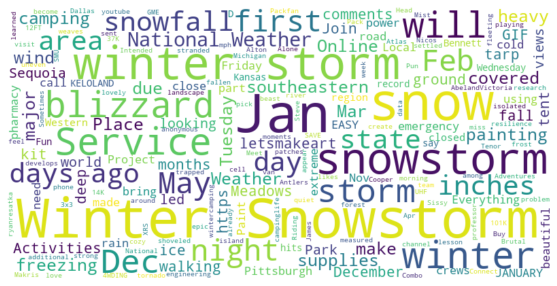

In [8]:
#add code for the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all snippets into a single string for the word cloud
all_snippets = " ".join(result['snippet'] for result in results if 'snippet' in result)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_snippets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5. Perform the named entity recognition on the descriptions.

In [10]:
import en_core_web_sm 
# Load the pretrained statistical models for English
nlp = en_core_web_sm.load()

# Pass the tweets to the pretrained statistical model
doc = nlp(all_snippets)

# Display all the NERs
if doc.ents: #if there are some entities, print them out
    for ent in doc.ents:
        print(f'{ent.text} : {ent.label_} - {spacy.explain(ent.label_)}')
    else: # no name entities found
        print(f'I can not find any name entities!')


May 31, 2024 : DATE - Absolute or relative dates or periods
10, 2018 : DATE - Absolute or relative dates or periods
The winter months : DATE - Absolute or relative dates or periods
morning : TIME - Times smaller than a day
May 30, 2024 : DATE - Absolute or relative dates or periods
100 : MONEY - Monetary values, including unit
GME : ORG - Companies, agencies, institutions, etc.
370 : CARDINAL - Numerals that do not fall under another type
WINTER : DATE - Absolute or relative dates or periods
12FT : CARDINAL - Numerals that do not fall under another type
Jan 10, 2025 : DATE - Absolute or relative dates or periods
Steve Packfan : PERSON - People, including fictional
Sissy Cooper : ORG - Companies, agencies, institutions, etc.
19, 2018 : DATE - Absolute or relative dates or periods
15 : MONEY - Monetary values, including unit
707 : CARDINAL - Numerals that do not fall under another type
December 2, 2023: : DATE - Absolute or relative dates or periods
Sequoia National Park : FAC - Building